In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
# exporting data from crimestatistics.vic.gov.au
fam_incidents2 = pd.read_excel("Resources/Data_Tables_Family_Incidents_Visualisation_Year_Ending_September_2022.xlsx","Table 01")
crime_record = pd.read_excel("Resources/Crime_data.xlsx","Table 01")
crime_record


,Year,Year ending,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,"Rate per 100,000 population"
0,2022,September,A Crimes against the person,A10 Homicide and related offences,A11 Murder,49,0.743236
1,2022,September,A Crimes against the person,A10 Homicide and related offences,A12 Attempted murder,26,0.394370
2,2022,September,A Crimes against the person,A10 Homicide and related offences,A14 Manslaughter & A13 Accessory/ conspiracy ...,29,0.439874
3,2022,September,A Crimes against the person,A10 Homicide and related offences,A15 Driving causing death,83,1.258950
4,2022,September,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,6953,105.463607
...,...,...,...,...,...,...,...
1116,2013,September,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,53,0.918120
1117,2013,September,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,233,4.036261
1118,2013,September,F Other offences,F90 Miscellaneous offences,F93 Cruelty to animals,189,3.274049
1119,2013,September,F Other offences,F90 Miscellaneous offences,F94 Dangerous substance offences,11,0.190553


In [3]:
# cleaning data for desired year 2018 to 2022 and for "Property & Deception offences"
clean_df = crime_record.query('Year==2018 or Year == 2019 or Year == 2020 or Year == 2021 or Year == 2022') 
clean_df=clean_df.query('`Offence Division` == "B Property and deception offences"')
clean_df

,Year,Year ending,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,"Rate per 100,000 population"
31,2022,September,B Property and deception offences,B10 Arson,B11 Cause damage by fire,1795,27.226690
32,2022,September,B Property and deception offences,B10 Arson,B12 Cause a bushfire,49,0.743236
33,2022,September,B Property and deception offences,B10 Arson,B19 Other fire related offences,321,4.868951
34,2022,September,B Property and deception offences,B20 Property damage,B21 Criminal damage,34970,530.427487
35,2022,September,B Property and deception offences,B20 Property damage,B22 Graffiti,3385,51.343925
...,...,...,...,...,...,...,...
502,2018,September,B Property and deception offences,B50 Deception,B54 State false information,990,15.424962
503,2018,September,B Property and deception offences,B50 Deception,B55 Deceptive business practices,205,3.194058
504,2018,September,B Property and deception offences,B50 Deception,B56 Professional malpractice and misrepresenta...,157,2.446181
505,2018,September,B Property and deception offences,B50 Deception,B59 Other deception offences,397,6.185566


In [4]:
# using groupby to get total number of offences per year
grouped_yr_df = clean_df.groupby(["Year"]).sum()
grouped_yr_df

,Offence Count,"Rate per 100,000 population"
Year,,
2018,288343,4492.605990
2019,297313,4552.438181
2020,282232,4272.262100
2021,251317,3838.049248
2022,243874,3699.098457


In [5]:
# bar chart showing trents in property and deception offences in victoria over the year
OffenceCount = grouped_yr_df["Offence Count"]
x_axis = np.arange(len(OffenceCount))

<IPython.core.display.Javascript object>


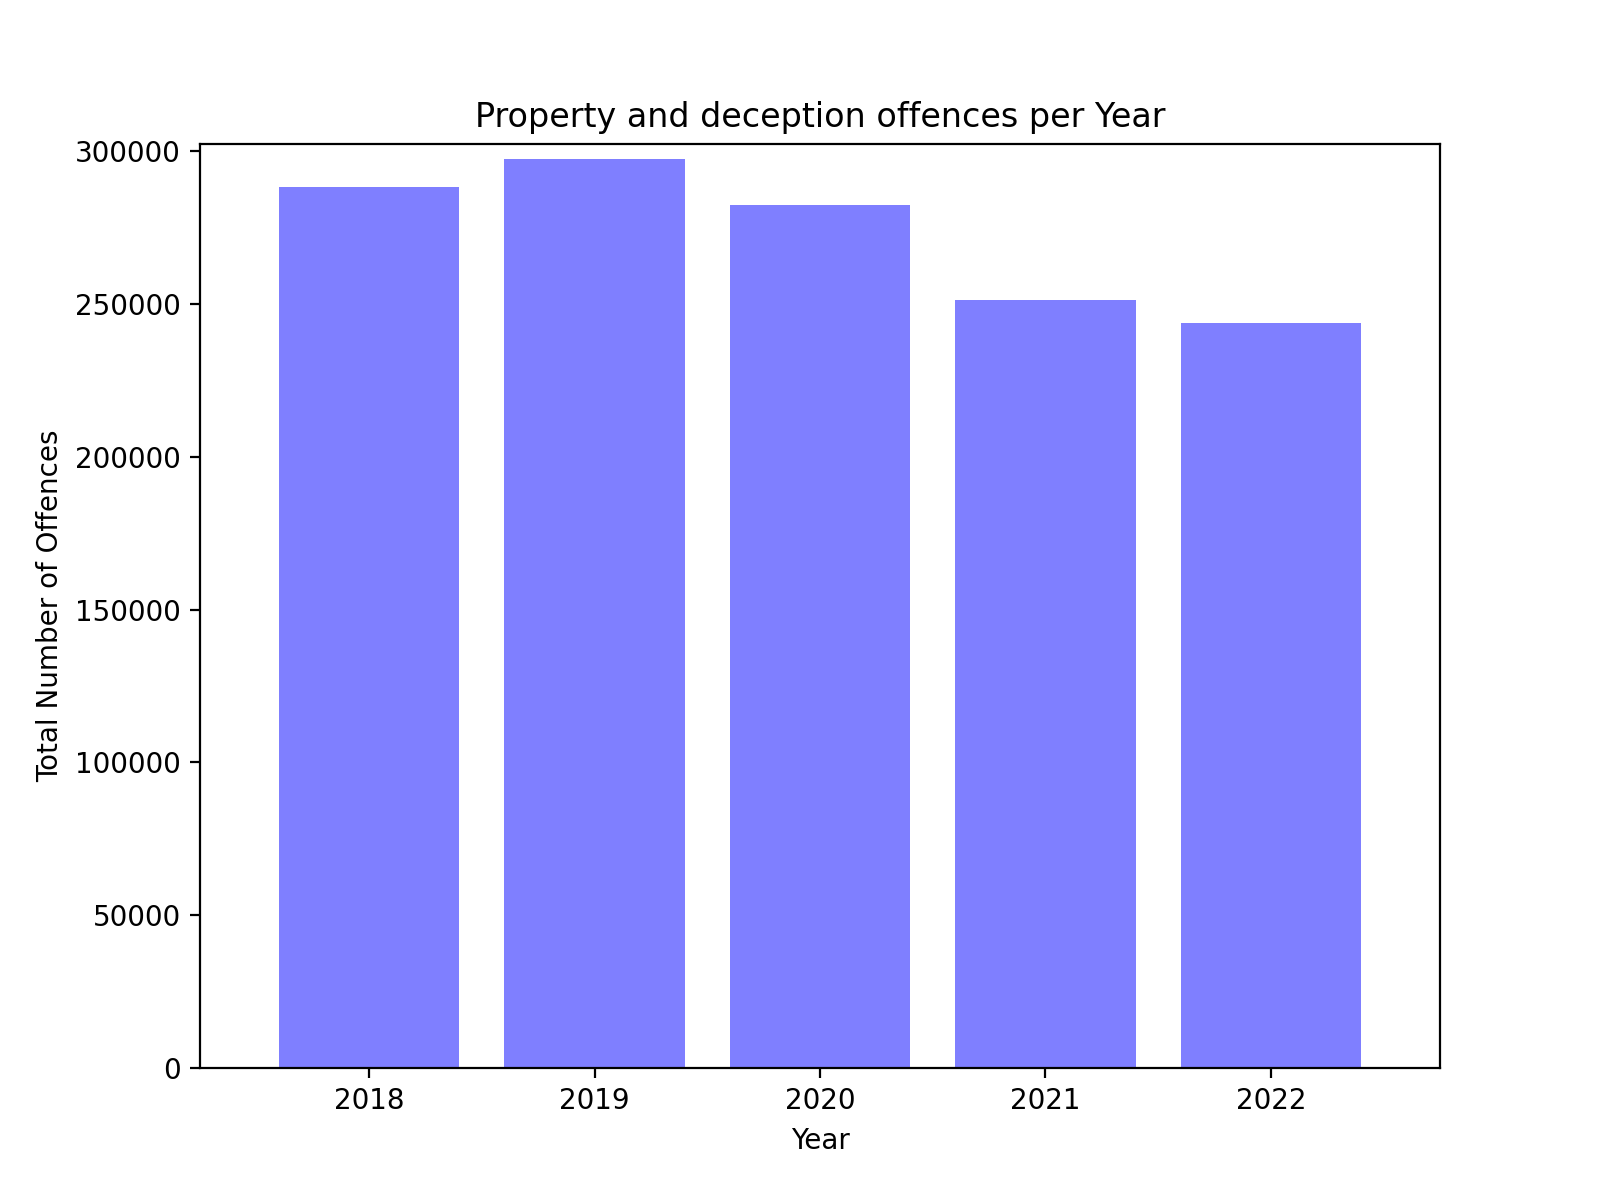

<function matplotlib.pyplot.show(block=None)>

In [6]:
plt.figure(figsize=(8,6))
plt.bar(x_axis, OffenceCount, color = 'b', alpha = 0.5, align = "center")
tick_location = [value for value in x_axis]
plt.xticks(tick_location, ["2018","2019","2020","2021","2022"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(OffenceCount)+5000)
plt.title("Property and deception offences per Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Offences")
plt.show

In [7]:
# getting total offences as per offence subdivision in property & deception offences
OffenceSubdivision = clean_df.groupby(["Offence Subdivision"]).sum()["Offence Count"]
OffenceSubdivision

Offence Subdivision
B10 Arson                        13102
B20 Property damage             198084
B30 Burglary/Break and enter    181472
B40 Theft                       804022
B50 Deception                   166373
B60 Bribery                         26
Name: Offence Count, dtype: int64

<IPython.core.display.Javascript object>


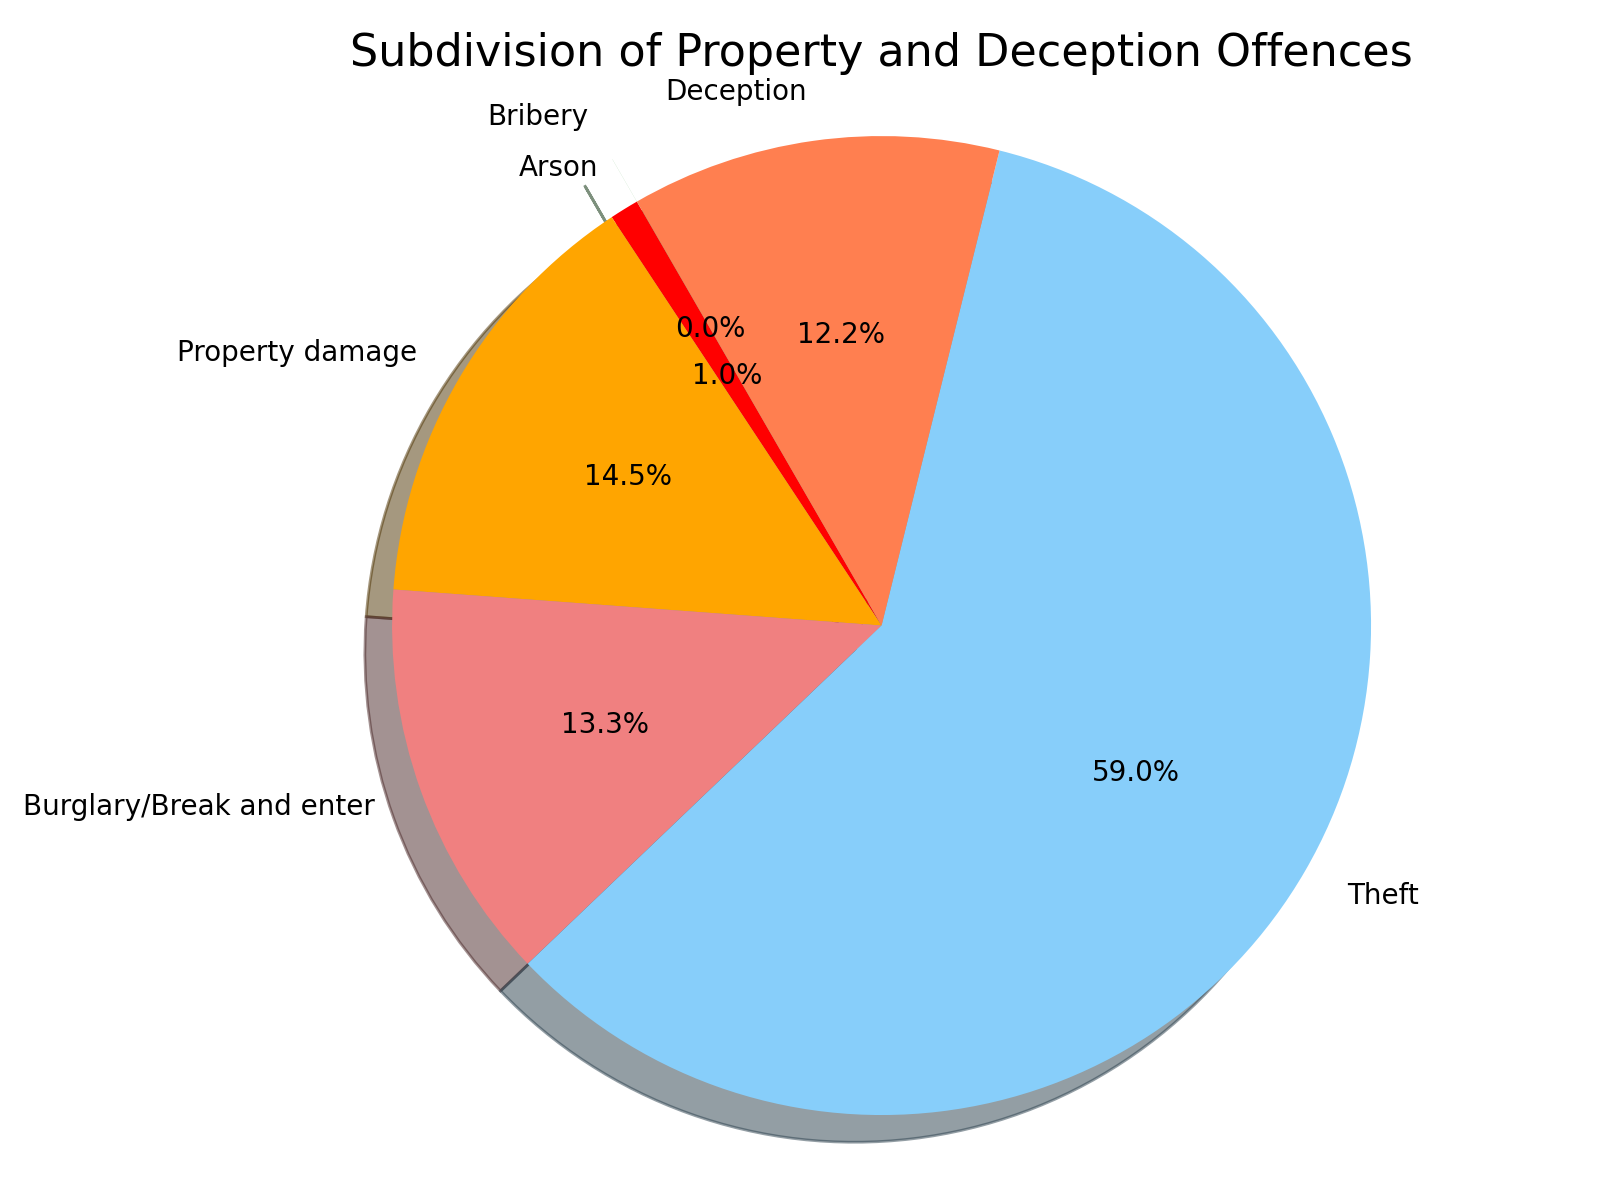

In [8]:
# pie chart showing distribution of offence subdivision

Offence_count = [13102,198084,181472,804022,166373,26]
Offence_subdivision =['Arson','Property damage','Burglary/Break and enter','Theft','Deception','Bribery'] 
colours = ["red", "orange", "lightcoral", "lightskyblue","coral","green"]
explode = (0, 0, 0, 0,0,0.1)
plt.figure(figsize=(8,6))
plt.pie(Offence_count,labels=Offence_subdivision, colors=colours,explode=explode,
        autopct="%1.1f%%",labeldistance=1.1, shadow=True, startangle=120)
plt.axis("equal")
plt.title('Subdivision of Property and Deception Offences',fontsize = 16)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


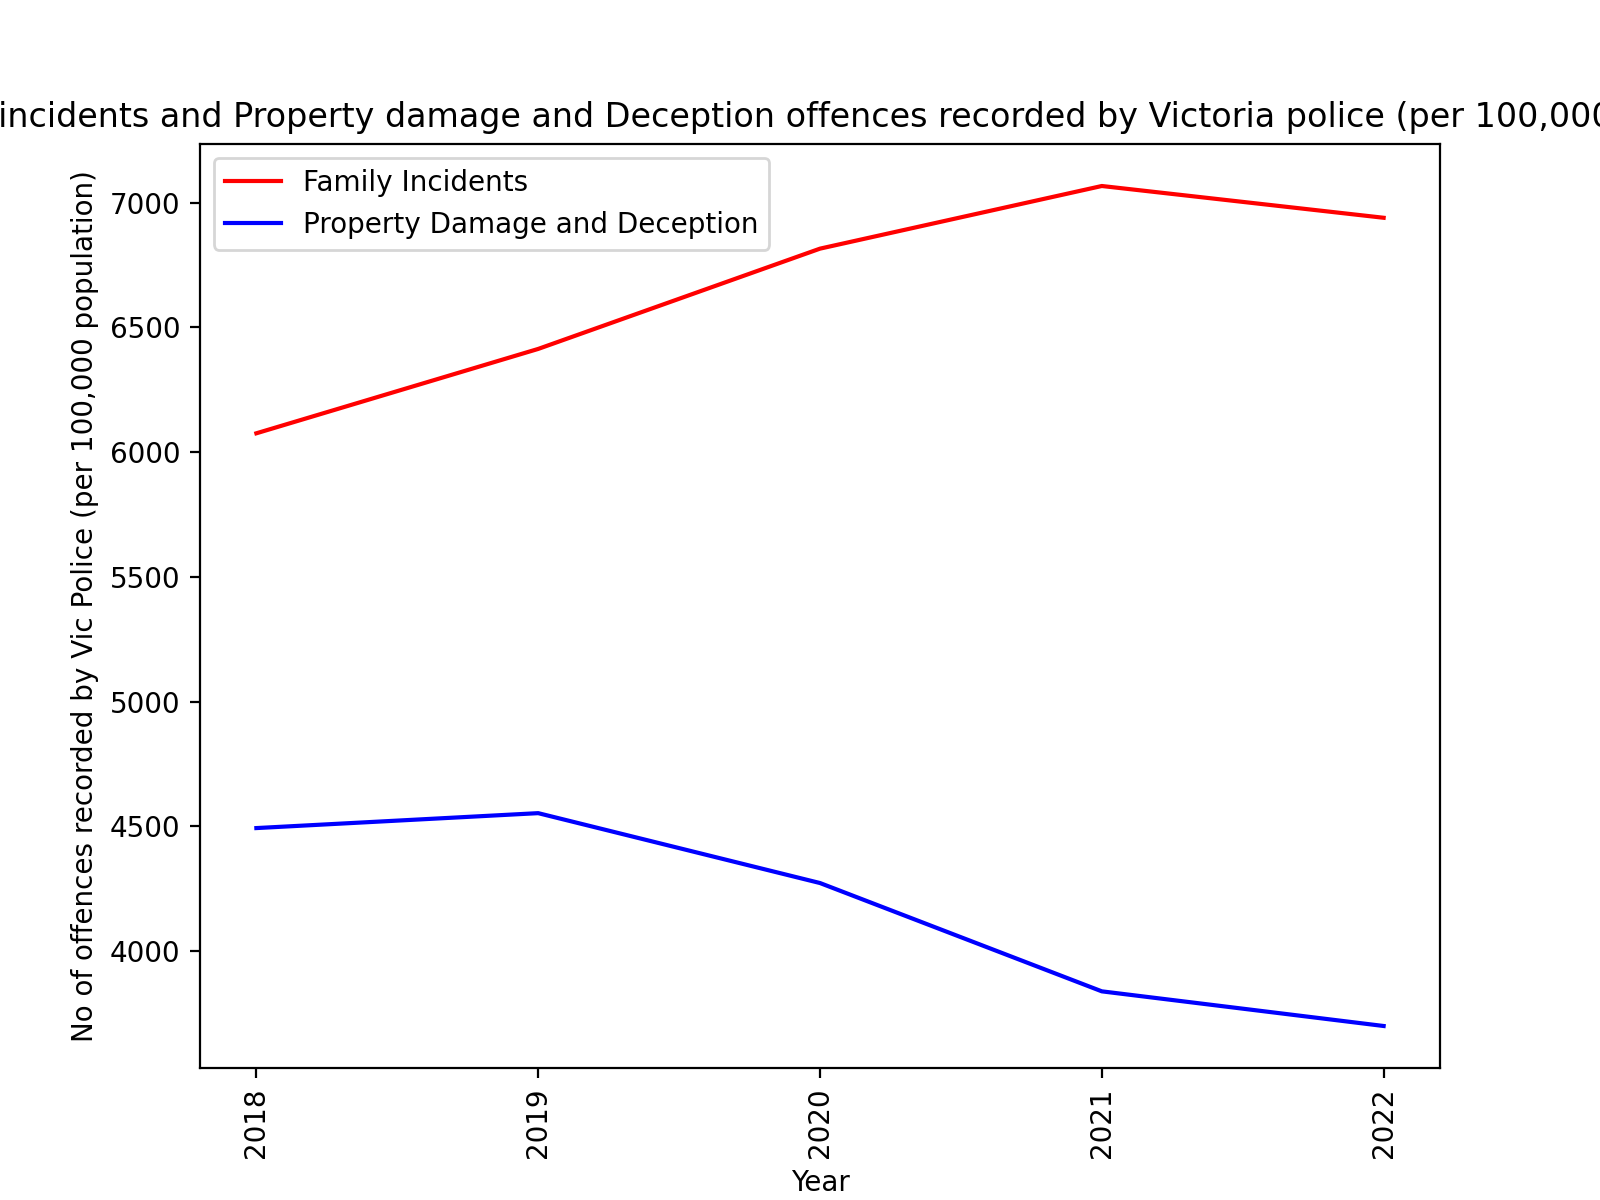

In [10]:
#Get the total of rate per population for each year
#Family incidents
Rate_per_pop_fam=fam_incidents2.groupby(["Year"]).sum()["Rate per 100,000 population"]

#property damages and deception
Rate_per_pop_prop=clean_df.groupby(["Year"]).sum()["Rate per 100,000 population"]

#Create a bar chart to display the number of family incidents per 100,000 population against the year.
x_axis = np.arange(len(Rate_per_pop_fam))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis,Rate_per_pop_fam, color = 'r', label = "Family Incidents")

plt.plot(x_axis,Rate_per_pop_prop, color = 'b', label = "Property Damage and Deception")

plt.xticks(tick_locations, ["2018", "2019", "2020", "2021", "2022"], rotation="vertical")
plt.xlabel("Year")
plt.ylabel("No of offences recorded by Vic Police (per 100,000 population)")
plt.title("Number of Family incidents and Property damage and Deception offences recorded by Victoria police (per 100,000 population) by Year")
plt.legend()
